# I-94 TRAFFIC DATASET

[Dataset url](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)  
[More information](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)  


## Attribute information:
- holiday Categorical US National holidays plus regional holiday, Minnesota State Fair
- temp Numeric Average temp in kelvin
- rain_1h Numeric Amount in mm of rain that occurred in the hour
- snow_1h Numeric Amount in mm of snow that occurred in the hour
- clouds_all Numeric Percentage of cloud cover
- weather_main Categorical Short textual description of the current weather
- weather_description Categorical Longer textual description of the current weather
- date_time DateTime Hour of the data collected in local CST time
- traffic_volume Numeric Hourly I-94 ATR 301 reported westbound traffic volume

In [1]:
import pandas as pd
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

# Examine the first five rows
print(traffic.head())

# Examine the last five rows
print(traffic.tail())

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  
      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0   

In [3]:
# Information
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


The dataset has 48204 rows and 9 columns  
There is no null values at all  
Time period: from 2012-10-02 09:00:00 to 2018-09-30 23:00:00

# Analysis Interstate-94 traffic volume

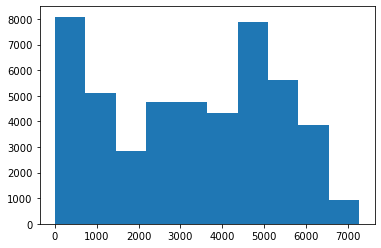

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(traffic['traffic_volume'])
plt.show()

In [5]:
# a few statistics about the traffic_volume column
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

The traffic volume ranges from 0 to 7280 cars with an average of 3259.8
Because mean and 50% relatively equal so, ... We can say that in 1 day, the traffic volume is four times bigger betweens rush hour and normal hour

# The traffic volume day time

In [6]:
# Transform the date_time column to datetime
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

In [7]:
import datetime as dt

traffic['time'] = traffic['date_time'].dt.hour

In [8]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
 9   time                 48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 3.7+ MB


In [9]:
traffic_day = traffic.loc[(traffic['time'] >= 7) & (traffic['time'] <= 18)]

In [10]:
traffic_night = traffic.loc[(traffic['time'] >=  19) | (traffic['time'] <= 6)]

In [16]:
print(traffic_day.shape)
print(traffic_night.shape)
print(traffic.shape)

(23877, 10)
(24327, 10)
(48204, 10)


The number of rows for each dataset is different. So, there is lack of data

In [23]:
traffic_day['time'].value_counts(normalize=True)

8     0.087113
7     0.087071
10    0.087029
9     0.084516
16    0.083260
18    0.083176
14    0.082464
12    0.081878
11    0.081752
15    0.080998
17    0.080957
13    0.079784
Name: time, dtype: float64

The proportions of each hour is different. So the data for 13h is missing.

In [24]:
traffic_night['time'].value_counts(normalize=True)

4     0.085954
6     0.085789
5     0.084803
1     0.084227
23    0.083857
0     0.083734
3     0.083241
2     0.082994
22    0.081967
21    0.081473
20    0.081350
19    0.080610
Name: time, dtype: float64

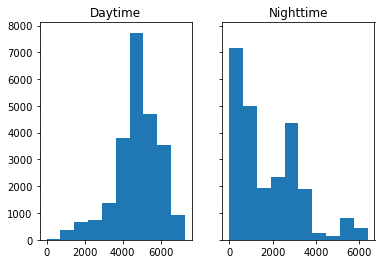

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2,sharey=True)
ax1.set_title('Daytime')
ax2.set_title('Nighttime')
ax1.hist(traffic_day['traffic_volume'])
ax2.hist(traffic_night['traffic_volume'])
plt.show()

In [32]:
traffic_night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

In [31]:
traffic_day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

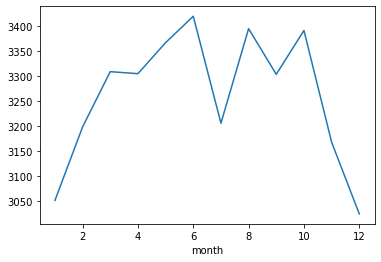

In [33]:
traffic['month'] = traffic['date_time'].dt.month
by_month = traffic.groupby('month').mean()
by_month['traffic_volume'].plot.line()
plt.show()

In [34]:
traffic_7 = traffic[traffic['month'] == 7]

In [36]:
print(traffic_7.shape)

(4795, 11)


In [39]:
traffic_7['year'] = traffic_7['date_time'].dt.year

/tmp/ipykernel_6777/2295704810.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic_7['year'] = traffic_7['date_time'].dt.year


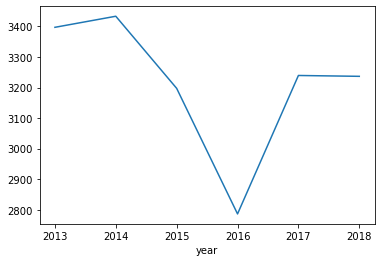

In [40]:
traffic_7_year = traffic_7.groupby('year').mean()
traffic_7_year['traffic_volume'].plot.line()
plt.show()

In [41]:
traffic_7_2016 = traffic_7[traffic_7['year'] == 2016]

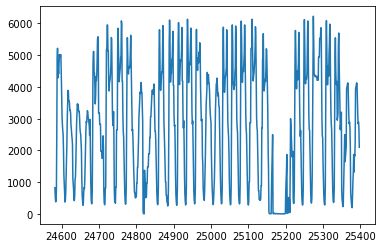

In [46]:
traffic_7_2016['traffic_volume'].plot.line()


In [48]:
traffic['day_of_week'] = traffic['date_time'].dt.day_of_week

In [49]:
traffic['day_of_week'].value_counts(normalize=True)

0    0.146710
2    0.143764
6    0.142561
1    0.142021
4    0.141814
5    0.141710
3    0.141420
Name: day_of_week, dtype: float64

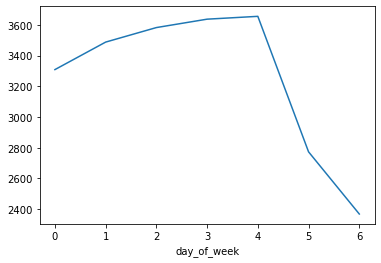

In [50]:
traffic_day_of_week = traffic.groupby('day_of_week').mean()
weekday = ['Monday', 'Tuesday', 'Wedsday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.plot(weekday, )
traffic_day_of_week['traffic_volume'].plot.line()
plt.show()

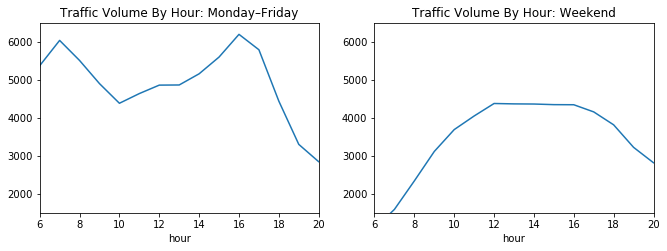

In [53]:
traffic['hour'] = traffic['date_time'].dt.hour
bussiness_days = traffic.copy()[traffic['day_of_week'] <= 4] # 4 == Friday
weekend = traffic.copy()[traffic['day_of_week'] >= 5] # 5 = Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()


plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
by_hour_business['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Monday–Friday')

plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Weekend')

plt.show()

luu luong tang vao mua nong va giam vao mua lah
luu luong tang vao ngay di lam va giam vao ngay cuoi tuan
trong ngay trong tuan, luu luong tang vao gio di lam va gio di ve
trong ngay cuoi tuan, luu luong tang vao luc trua khi mn di choi
thang 6/2016 co sua duong nen hay xoa no neu can phan tich bang ml di nhe ae